In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [3]:
df=pd.read_excel('dataset without year.xlsx')
df.head()

,region,month,avg_temp,avg_max_temp,avg_min_temp,avg_hum,avg_death,total_death
0,East of England,1,4.09,7.06,1.12,87.00,0.64,9
1,East of England,2,4.78,8.04,1.48,84.64,0.36,5
2,East of England,3,7.50,11.73,3.26,80.64,0.29,4
3,East of England,4,9.63,14.04,5.21,78.50,0.43,6
4,East of England,5,11.96,16.24,7.67,70.36,0.21,3


In [5]:
df_new=df.drop(columns=['region','month'])
df_new.head()

,avg_temp,avg_max_temp,avg_min_temp,avg_hum,avg_death,total_death
0,4.09,7.06,1.12,87.00,0.64,9
1,4.78,8.04,1.48,84.64,0.36,5
2,7.50,11.73,3.26,80.64,0.29,4
3,9.63,14.04,5.21,78.50,0.43,6
4,11.96,16.24,7.67,70.36,0.21,3


In [7]:
df_new.corr()['total_death']

avg_temp        0.151946
avg_max_temp    0.134001
avg_min_temp    0.173184
avg_hum        -0.170218
avg_death       0.999978
total_death     1.000000
Name: total_death, dtype: float64

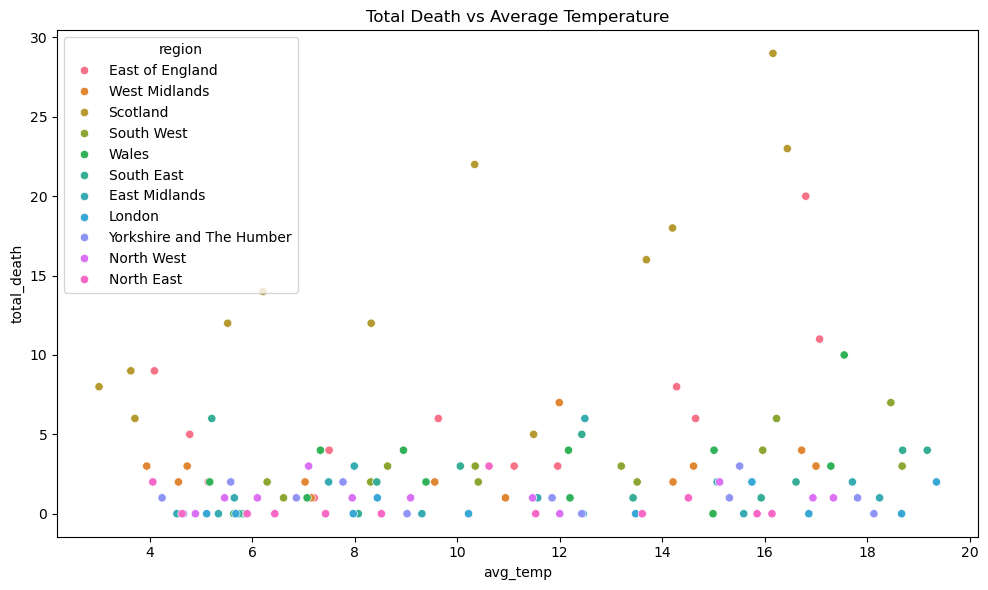

In [58]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total_death', hue='region', data=df)
plt.title('Total Death vs Average Temperature')
plt.tight_layout()
plt.show()

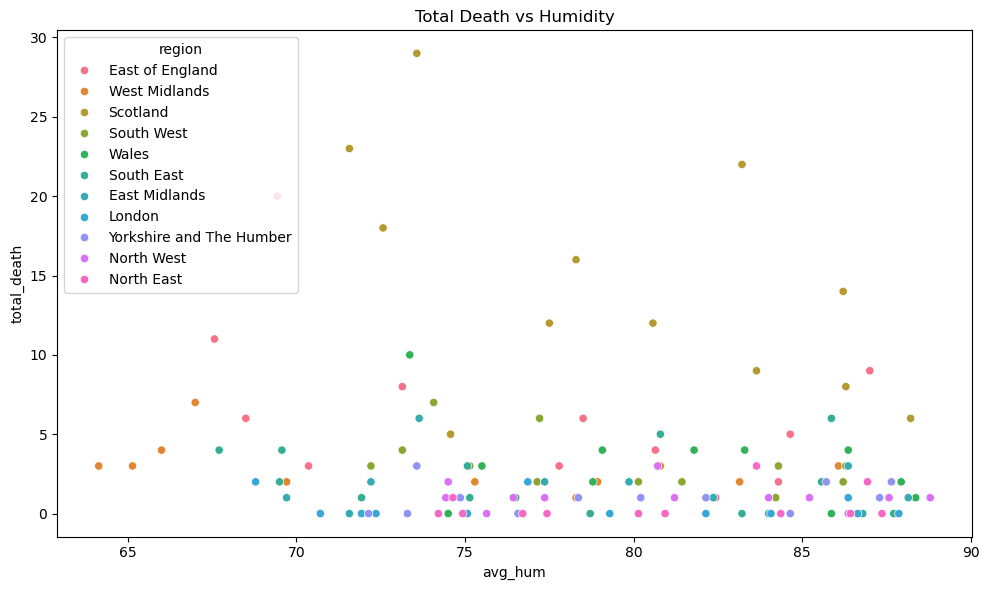

In [56]:
# 4. Total Death vs Avg_Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hum', y='total_death', hue='region', data=df)
plt.title('Total Death vs Humidity')
plt.tight_layout()
plt.show()


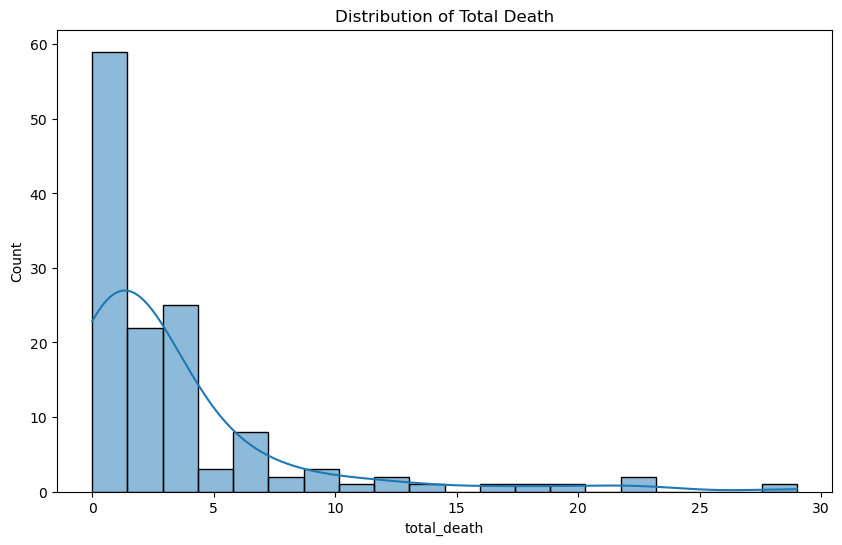

In [40]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_new['total_death'], bins=20, kde=True)
plt.title('Distribution of Total Death')
plt.show()

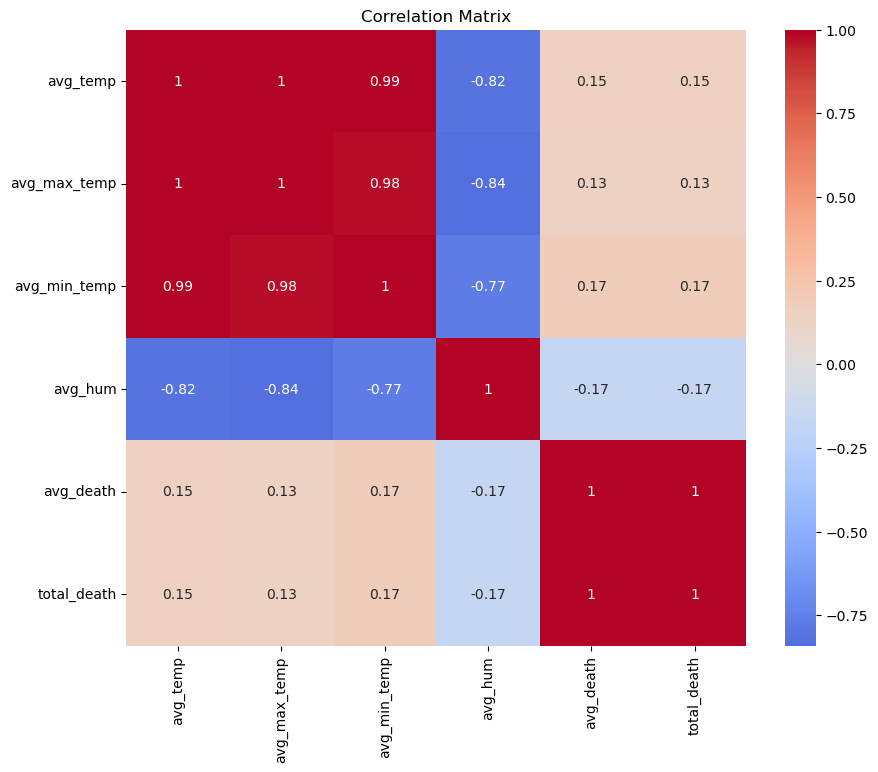

In [11]:
# Correlation matrix
corr_matrix = df_new.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Prepare data for modeling
X = df_new[['avg_temp', 'avg_max_temp', 'avg_min_temp', 'avg_hum']]
y = df_new['total_death']

In [48]:
# Add constant for statsmodels (intercept term)
X_sm = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Absolute Error: 3.48
Mean Squared Error: 30.97
R-squared: -0.06


Mean Absolute Error (MAE): 3.75
This means that, on average, the model's predictions are off by 3.75 units from the actual values.
Lower MAE is better (0 means perfect predictions).

        MAE is less sensitive to outliers compared to MSE.

Mean Squared Error (MSE): 36.19
This means that, on average, the squared difference between the model's predictions and the actual values is 36.19. Since MSE squares errors, it penalizes larger errors more heavily. A lower MSE is better (0 means perfect predictions).

The higher MSE compared to MAE suggests that the model has some large errors (outliers or significant mispredictions).

In [27]:
# Using statsmodels for detailed statistics
sm_model = sm.OLS(y, X_sm).fit()
print("\nRegression Summary:")
print(sm_model.summary())


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            total_death   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     3.661
Date:                Wed, 23 Apr 2025   Prob (F-statistic):            0.00740
Time:                        13:10:52   Log-Likelihood:                -389.54
No. Observations:                 132   AIC:                             789.1
Df Residuals:                     127   BIC:                             803.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.5511    

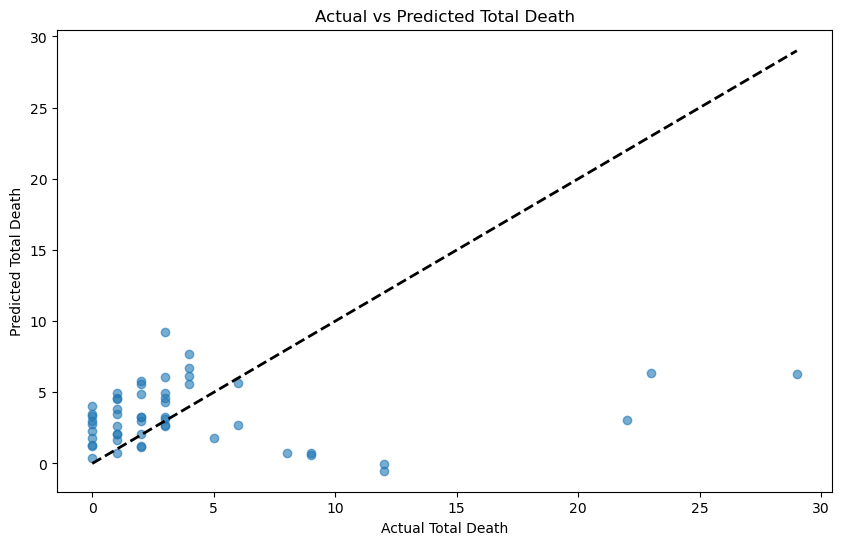

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Total Death')
plt.ylabel('Predicted Total Death')
plt.title('Actual vs Predicted Total Death')
plt.show()

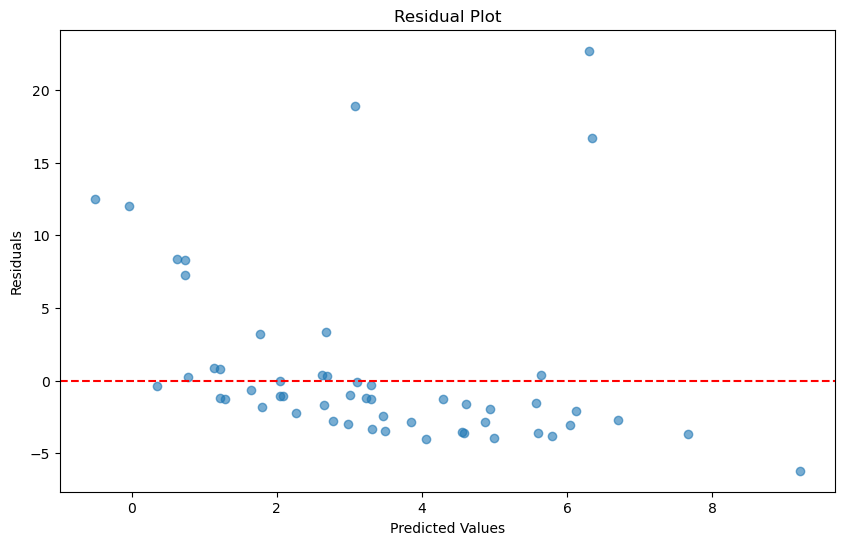

In [23]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()